## 逻辑回归解决多分类问题

### 案例： 手写数字识别

### 数据集：ex3data1.mat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
data = sio.loadmat('ex3data1.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
raw_X = data['X']
raw_y = data['y']

In [7]:
print(raw_X.shape,raw_y.shape)

(5000, 400) (5000, 1)


In [8]:
def plot_an_image(X):
    
    pick_one = np.random.randint(5000)
    
    image = X[pick_one,:]
    
    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap = 'gray_r')
    
    plt.xticks([])
    plt.yticks([])

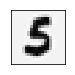

In [9]:
plot_an_image(raw_X)

In [10]:
def plot_100_image(X):
    
    sample_index = np.random.choice(len(X),100)
    images = X[sample_index,:]
    print(images.shape)
    
    fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True)
    
    for r in range(10):
        for c in range(10):
            
            ax[r,c].imshow(images[10 * r + c].reshape(20,20).T,cmap='gray_r')
            
    
    plt.xticks([])
    plt.yticks([])
    
    plt.show

(100, 400)


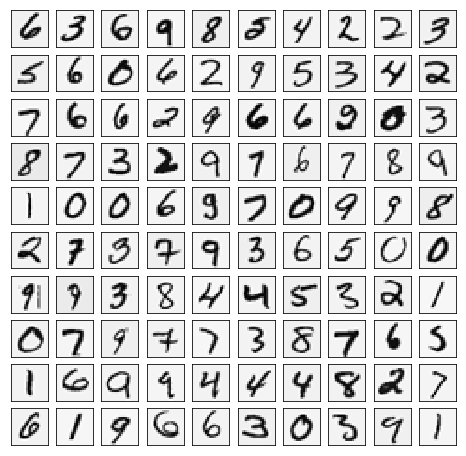

In [11]:
plot_100_image(raw_X)

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
def costFunction(theta,X,y,lamda):
    A = sigmoid(X@theta)
    
    first = y*np.log(A)
    second = (1-y) * np.log(1-A)
    
#     reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 * len(X)))
    reg = theta[1:] @ theta[1:] * (lamda / (2 * len(X)))
    return -np.sum(first + second ) / len(X) + reg

In [14]:
def gradient_reg(theta,X,y,lamda):
    reg = theta[1:] * (lamda / len(X))
    reg = np.insert(reg,0,values=0,axis=0)
    
    first = (X.T@(sigmoid(X@theta) - y)) / len(X)
    
    return first + reg

In [15]:
X  = np.insert(raw_X,0,values=1,axis=1)
X.shape

(5000, 401)

In [16]:
y = raw_y.flatten()
y.shape

(5000,)

In [24]:
from scipy.optimize import minimize

def one_vs_all(X,y,lamda,K):
    
    n = X.shape[1]
    
    theta_all = np.zeros((K,n))
    
    for i in range(1,K+1):
        theta_i = np.zeros(n,)
        
        res = minimize(fun =costFunction,
                      x0 = theta_i,
                      args = (X, y == i,lamda),
                      method = 'TNC',
                      jac =gradient_reg )
        theta_all[i-1,:] = res.x
        
    return theta_all

In [25]:
lamda  = 1
K =10

In [26]:
theta_final = one_vs_all(X,y,lamda,K)

In [27]:
theta_final

array([[-2.38254553e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30406547e-03, -6.70849486e-10,  0.00000000e+00],
       [-3.18591091e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45934386e-03, -5.08441915e-04,  0.00000000e+00],
       [-4.79733711e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87215793e-05, -2.47384656e-07,  0.00000000e+00],
       ...,
       [-7.98651680e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.92840841e-05,  7.19407606e-06,  0.00000000e+00],
       [-4.57016481e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33513727e-03,  9.98105892e-05,  0.00000000e+00],
       [-5.40479379e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16650159e-04,  7.88866587e-06,  0.00000000e+00]])

In [28]:
def predict(X,theta_final):
    
    h = sigmoid(X@theta_final.T) #(5000,401) (10,401) =>(5000,10)
    
    h_argmax = np.argmax(h,axis=1)
    
    return h_argmax + 1

In [29]:
y_pred = predict(X,theta_final)

In [30]:
acc = np.mean(y_pred == y)

In [31]:
acc

0.9446